In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# gerando uma série temporal de exemplo
np.random.seed(0)
time = np.arange(100)
data = 0.5 * time + 2 * np.sin(time) + np.random.normal(size=time.size)

In [3]:
df = pd.DataFrame({'time': time, 'value': data})
df['lag_1'] = df['value'].shift(1)
df.dropna(inplace=True)

In [4]:
# divisão manual dos dados de treino e teste
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# definindo as variáveis dependente e independente
X_train, y_train = train[['lag_1']], train['value']
X_test, y_test = test[['lag_1']], test['value']

In [9]:
train

,time,value,lag_1
1,1,2.583099,1.764052
2,2,3.797333,2.583099
3,3,4.023133,3.797333
4,4,2.353953,4.023133
5,5,-0.395126,2.353953
...,...,...,...
75,75,36.039627,35.432049
76,76,38.261418,36.039627
77,77,39.920191,38.261418
78,78,39.716404,39.920191


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

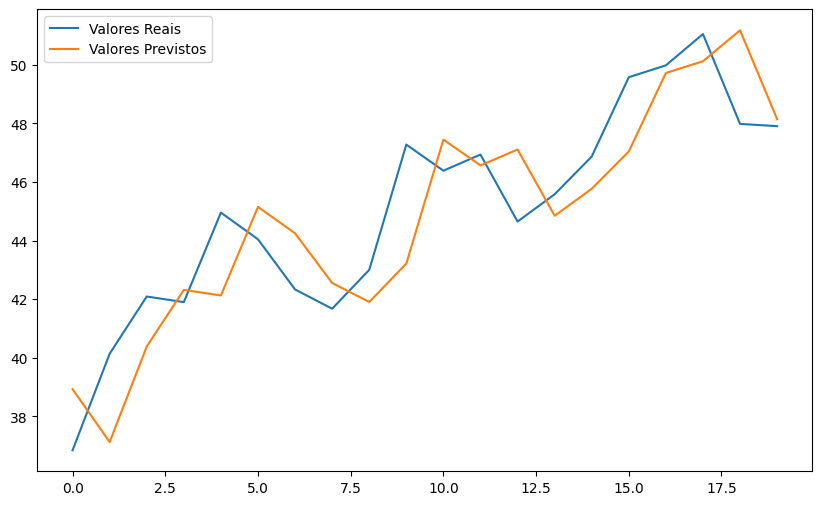

In [6]:
# previsões com o modelo treinado
y_pred = model.predict(X_test)

# visualização dos resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reais')
plt.plot(y_pred, label='Valores Previstos')
plt.legend()
plt.show()

In [10]:
import ipeadatapy as ip

In [12]:
series = ip.list_series()
series

,CODE,NAME
0,ABATE_ABPEAV,Abate - aves - peso das carcaças
1,ABATE_ABPEBV,Abate - bovinos - peso das carcaças
2,ABATE_ABPESU,Abate - suínos - peso das carcaças
3,ABATE_ABQUAV,Abate - aves - quantidade
4,ABATE_ABQUBV,Abate - bovinos - quantidade
...,...,...
8987,PNADCT_TXPARTCUF_SI,Taxa de participação - sem instrução ou equiva...
8988,PNAD_IAGRV,Domicílios com insegurança alimentar grave
8989,PNAD_IALEV,Domicílios com insegurança alimentar leve
8990,PNAD_IAMOD,Domicílios com insegurança alimentar moderada


In [15]:
cod = "EIA366_PBRENT366"
eia366 = ip.timeseries(cod)
eia366

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$)
DATE,,,,,,
1986-01-04,EIA366_PBRENT366,1986-01-04T00:00:00-02:00,4,1,1986,NaN
1986-01-05,EIA366_PBRENT366,1986-01-05T00:00:00-02:00,5,1,1986,NaN
1986-01-06,EIA366_PBRENT366,1986-01-06T00:00:00-02:00,6,1,1986,NaN
1986-01-07,EIA366_PBRENT366,1986-01-07T00:00:00-02:00,7,1,1986,NaN
1986-01-08,EIA366_PBRENT366,1986-01-08T00:00:00-02:00,8,1,1986,NaN
...,...,...,...,...,...,...
2024-07-23,EIA366_PBRENT366,2024-07-23T00:00:00-03:00,23,7,2024,82.20
2024-07-24,EIA366_PBRENT366,2024-07-24T00:00:00-03:00,24,7,2024,83.01
2024-07-25,EIA366_PBRENT366,2024-07-25T00:00:00-03:00,25,7,2024,82.58


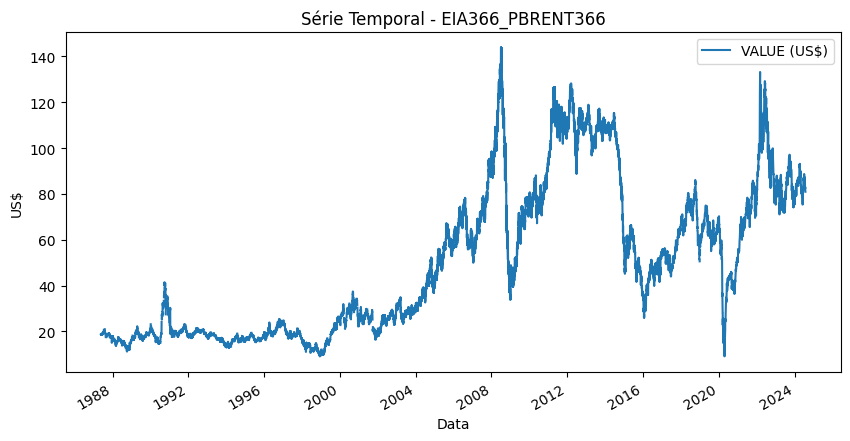

In [14]:
# plota os dados
eia366[["VALUE (US$)"]].plot(figsize=(10, 5))
plt.title("Série Temporal - EIA366_PBRENT366")
plt.xlabel("Data")
plt.ylabel("US$")
plt.show()